$\large Logica \  Computacional\ 02-Outubro-2023 \ LCC$

$\textbf{Grupo 06:}$

* João Manuel Franqueira da Silva, A91638
* Eduardo Manuel Sousa Pereira, A70619


$\huge TP1 - Problema\ 2 $

Um sistema de tráfego  é representado por um grafo orientado ligado. Os nodos denotam pontos de acesso e  os arcos denotam vias de comunicação só com um sentido .  O grafo tem de ser ligado: entre cada par de nodos $\textit{<n1,n2>}$ tem de existir um caminho $n_1 \leadsto n_2$ e um caminho $n_2\leadsto n_1$.

In [1]:
from ortools.linear_solver import pywraplp
import random
from pysmt.shortcuts import Symbol, LE, GE, Int, And, Equals, Plus, Solver, Not, Or, GT, get_model
from pysmt.typing import INT
import networkx as nx
import matplotlib.pyplot as plt
import copy


${\normalsize\text{Gerar aleatoriamente o grafo com   $N \in \{8, \ldots,15\}$ nodos e com ramos verificando:}}$

1.  Cada nodo tem um número aleatório de descendentes $d \in \{1, \ldots,3\}$ cujos destinos são também gerados aleatoriamente. 
2.  Se  existirem “loops”  ou destinos repetidos, deve-se gerar outro grafo.

O seguinte problema, pode ser traduzido então numa matriz quadrada $\text{NxN}$ preenchida por zeros e uns, em que $\text{matriz[i][j] == 1}$ denota a existência de uma aresta do nodo $\text{i}$ para o nodo $\text{j}$.
Para evitar a existência de loops no grafo, temos que prevenir que $\text{matriz[i][i] == 1}$ para qualquer $\text{i}$.

O problema pode ser descrito por:

$ 0 < \forall_{i=0}^{n-1} \sum_{j=0}^{n-1} matriz[i][j] \le 3$ 

$ \forall_{i=0}^{n-1} matriz[i][i]\neq 0$

De seguida, traduzimos a nossa matriz para um grafo, adicionando os nodos e vértices de $\text{i}$ para $\text{j}$ quando $\text{matriz[i][j] = 1 }$.
Por último, verificamos se o grafo é conexo, chamando a função $\text{nx.is_strongly_connected()}$. Se o grafo não for conexo, voltamos a formar outra matriz, até encontrarmos uma que represente um grafo conexo.

In [2]:
nodos=random.randint(8,15)

while True:
    grafo=nx.DiGraph()

    for n in range(nodos):
        grafo.add_node(n)

    matriz = []
    for i in range(nodos):
        row = [0] * nodos
        matriz.append(row)

    for v1 in range(nodos):
        x=0
        arco=random.randint(1,3)
        
        while x<arco:
            v2=random.randint(0,nodos-1)
            if v2!=v1 and matriz[v1][v2]==0:
                matriz[v1][v2]=1
                x=x+1

    for v1 in range(nodos):
        for v2 in range(nodos):
            if v1!=v2:
                if matriz[v1][v2]==1:
                    grafo.add_edge(v1,v2)
    r=nx.is_strongly_connected(grafo)
    
  
    if r==True:
        break


${\LARGE\text{Desenho do grafo gerado e informação sobre os nodos e arestas:}}$

{0: [3, 5, 6], 1: [2], 2: [0, 4, 6], 3: [1, 5, 6], 4: [0, 7], 5: [1], 6: [2, 3], 7: [6]}


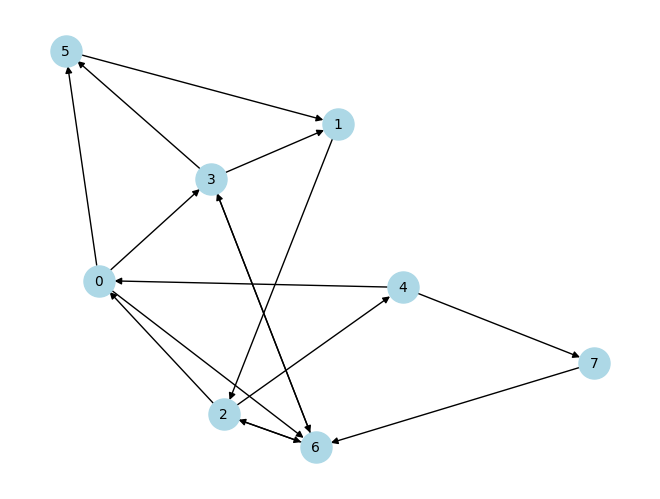

In [3]:
print(nx.to_dict_of_lists(grafo))
nx.draw(grafo, with_labels=True, node_size=500, node_color='lightblue', font_size=10)
plt.show()


${\normalsize\text{Pretende-se fazer  manutenção interrompendo  determinadas vias.}}$ 
${\normalsize\text{Determinar o maior número de vias que é possível remover mantendo o grafo ligado:}}$

A seguinte função, calcula o maior número de arestas que se podem remover enquanto o grafo continua conexo, fazendo uma cópia do grafo e retirando arestas. 

Se esta cópia continuar conexa, entao é feita uma chamada recursiva e o valor de $\text{x}$ incrementado, quando a remoção de uma aresta resulta num grafo nao conexo, não é feita nenhuma chamada recursiva, e o valor de $\text{x}$ descartado.

O dicionário $\text{memo}$, é utilizado para não realizar computações repetidas sobre o resultado do atual valor de x, tornando a função mais eficiente.

Por último, o valor de $\text{y}$ (número de arestas já removidas) é comparado com o $\text{valormax}$ (maior número de arestas já retiradas) e, caso seja maior, $\text{valormax}$ é atualizado.

In [4]:
#esta funçao calcula o maior numero de arestas que se podem remover, enquanto o grafo continua conecto
def func(grafo, x, memo={}):
    if x in memo:
        return memo[x]
    
    valormax = x 
    for (o, d) in grafo.edges():
        gr = grafo.copy()
        gr.remove_edge(o, d)
        if nx.is_strongly_connected(gr):
            y = func(gr, x + 1, memo)
            if y > valormax:
                valormax = y
                 
    
    memo[x] = valormax
    return valormax

${\normalsize\text{Número de arestas que é possivel retirar:}}$

In [5]:
g2 = grafo.copy()
r=func(g2, 0)
print("Maior número de arestas retiradas ao grafo de forma a continuar conexo: %s"%(r))

Maior número de arestas retiradas ao grafo de forma a continuar conexo: 7


${\LARGE\text{Exemplo 1}}$

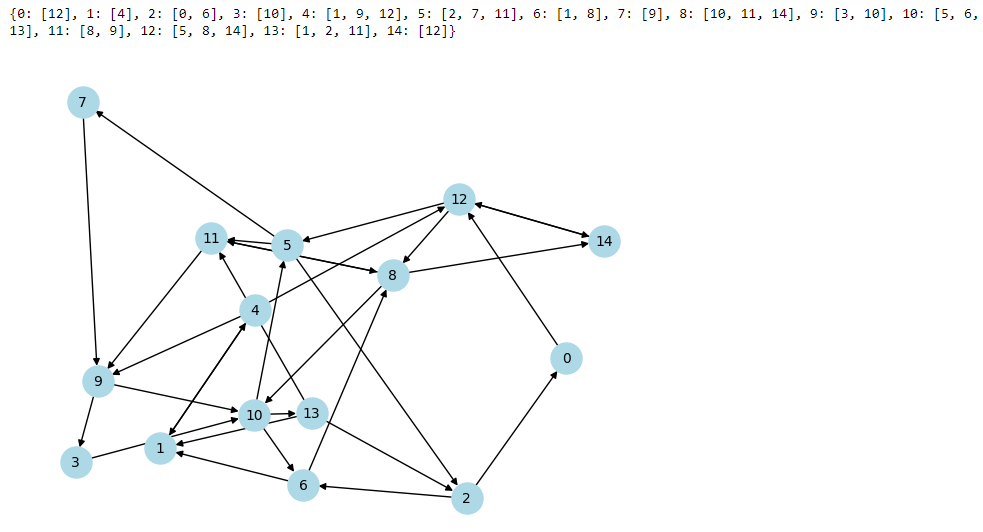

${\LARGE\text{Exemplo 2}}$

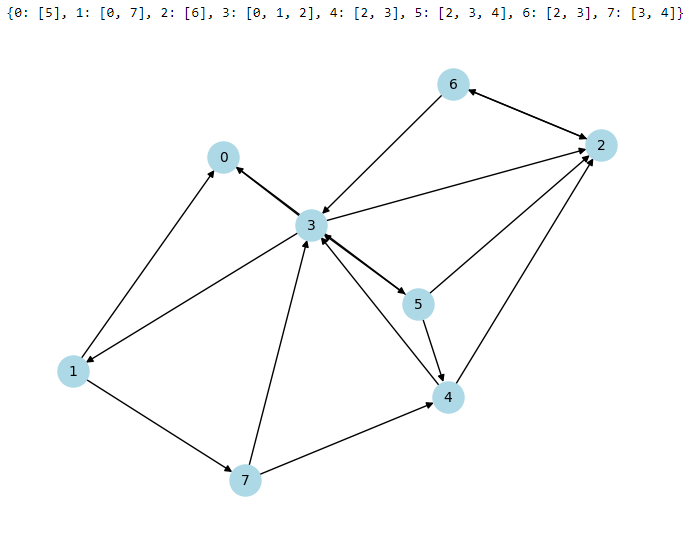